In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

x_data_years = np.arange(1994,2023)

In [3]:
# Customize the default plotting style
plt.rcParams['figure.figsize'] = (8, 6)  # Set the default figure size
plt.rcParams['axes.labelsize'] = 14      # Set the default label font size
plt.rcParams['axes.titlesize'] = 16      # Set the default title font size
plt.rcParams['xtick.labelsize'] = 12     # Set the default x-axis tick font size
plt.rcParams['ytick.labelsize'] = 12     # Set the default y-axis tick font size
plt.rcParams['lines.linewidth'] = 2.0    # Set the default line width
plt.rcParams['lines.markersize'] = 8     # Set the default marker size
plt.rcParams['legend.fontsize'] = 12     # Set the default legend font size
plt.rcParams['axes.grid'] = True         # Enable grid lines by default

# Now, all subsequent plots in your script will use these settings


In [4]:
data_dir = 'data/alldata/'

# Erstellen Sie eine leere Liste, um DataFrames zu speichern
years = []



#Schleife für die Monate
for year in range(1994,2023):
    dataframes = []
    for month in range(1, 13):
        file = f'NYA_cont_meteorology_{year}-{month:02d}.tab'
        filename = data_dir + file

        comment_lines = 0
        with open(filename, 'r') as file:
            for line in file:
                if line.startswith('*/'):
                    break
                comment_lines += 1
        # Erzeugen des Dateinamens
        

        # Lesen der CSV-Datei für den aktuellen Monat
        df = pd.read_csv(filename,  skiprows=comment_lines+1,sep='\t')

        df['Date/Time'] = pd.to_datetime(df['Date/Time'])
        # print('Zahlen der NaN-Einträge: '+str(np.sum(np.isnan(df['T2 [°C] (average, Thermometer)']))))
        # df.loc[np.isnan(df['T2 [°C] (average, Thermometer)']),'T2 [°C] (average, Thermometer)'] = np.mean(df['T2 [°C] (average, Thermometer)'])

        # Fügen Sie den DataFrame zur Liste hinzu
        dataframes.append(df)
    years.append(dataframes.copy())





In [5]:
years[9][0]

,Date/Time,Height [m],SSD [min] (average),"T10 [°C] (average, Thermometer)","DD10 [deg] (average, Anemometer)","FF10 [m/s] (average, Anemometer)","T2 [°C] (average, Thermometer)","DD2 [deg] (average, Anemometer)","FF2 [m/s] (average, Anemometer)","RH [%] (average, redundant measuremen...)","RH [%] (average, redundant measuremen...).1","PoPoPoPo [hPa] (average, Barometer)","SWD OG1 [W/m**2] (average, Pyranometer)","SWD RG8 [W/m**2] (average, Pyranometer)","UV rad [W/m**2] (average, Total Ultraviolet Ra...)"
0,2003-01-01 00:00:00,2,0.0,-8.6,153.9,3.3,-9.3,164.9,2.9,44.4,43.3,1026.50,-0.6,-0.4,0.0
1,2003-01-01 00:01:00,2,0.0,-8.2,156.7,3.5,-9.1,159.3,3.3,44.6,43.3,1026.48,-0.5,-0.4,0.0
2,2003-01-01 00:02:00,2,0.0,-8.3,145.5,3.2,-8.6,152.2,2.8,43.3,42.1,1026.49,-0.6,-0.5,0.0
3,2003-01-01 00:03:00,2,0.0,-8.3,148.4,3.0,-8.8,146.5,2.6,43.7,42.7,1026.47,-0.6,-0.5,0.0
4,2003-01-01 00:04:00,2,0.0,-8.5,144.1,3.4,-9.1,143.7,2.7,44.6,43.6,1026.42,-0.6,-0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44616,2003-01-31 23:55:00,2,0.0,-17.3,145.6,3.1,-18.4,158.0,3.0,61.8,59.5,1005.47,-0.1,-0.1,0.0
44617,2003-01-31 23:56:00,2,0.0,-17.2,155.4,3.3,-18.2,162.2,3.0,61.8,59.5,1005.48,-0.1,0.0,0.0
44618,2003-01-31 23:57:00,2,0.0,-17.2,138.5,3.1,-18.8,162.2,2.5,64.6,62.3,1005.47,0.0,0.0,0.0
44619,2003-01-31 23:58:00,2,0.0,-17.2,156.8,3.2,-18.1,166.4,2.8,60.9,58.2,1005.48,-0.1,0.0,0.0


(array([12449., 12453., 12457., 12461., 12465., 12469., 12473., 12477.,
        12478.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

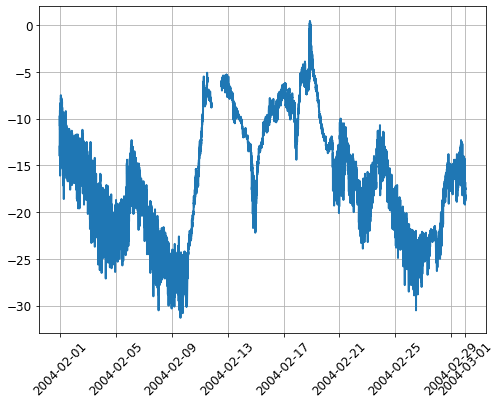

In [6]:

plt.plot(years[10][1]['Date/Time'],years[10][1]['T2 [°C] (average, Thermometer)'])
plt.xticks(rotation = 45)
#plt.xlim(pd.to_datetime('1994-02-07'), pd.to_datetime('1994-02-19'))

In [7]:
Wind_all = []

for y in range(len(years)):
    wind_year = []
    for i in range(0,12):
        #print(str(y)+ '/'+str(i))
    # Sample temperature data
        data = years[y][i]['FF10 [m/s] (average, Anemometer)']

        df_wind = pd.DataFrame(columns=['Date', 'wind'])  # In m/s

        subset_length = 1440
        print(str(y)+ '/'+str(i))

        for start in range(0, len(data), subset_length):
            
            subset = data.iloc[start:start + subset_length]
            if np.sum(np.isnan(subset)) < 200:
                temp_wind = np.mean(subset)

                date_value = years[y][i]['Date/Time'].iloc[start]  # Assuming you want the date at the start of each subset
                df_temp = pd.DataFrame({'Date': [date_value], 'wind': [temp_wind]})
                df_wind = pd.concat([df_wind, df_temp], ignore_index=True)
        wind_year.append(df_wind.copy())
    Wind_all.append(wind_year.copy())
    # Now df_DTR contains the calculated DTR values with corresponding dates



0/0
0/1
0/2
0/3
0/4
0/5
0/6
0/7
0/8
0/9
0/10
0/11
1/0
1/1
1/2
1/3
1/4
1/5
1/6
1/7
1/8
1/9
1/10
1/11
2/0
2/1
2/2
2/3
2/4
2/5
2/6
2/7
2/8
2/9
2/10
2/11
3/0
3/1
3/2
3/3
3/4
3/5
3/6
3/7
3/8
3/9
3/10
3/11
4/0
4/1
4/2
4/3
4/4
4/5
4/6
4/7
4/8
4/9
4/10
4/11
5/0
5/1
5/2
5/3
5/4
5/5
5/6
5/7
5/8
5/9
5/10
5/11
6/0
6/1
6/2
6/3
6/4
6/5
6/6
6/7
6/8
6/9
6/10
6/11
7/0
7/1
7/2
7/3
7/4
7/5
7/6
7/7
7/8
7/9
7/10
7/11
8/0
8/1
8/2
8/3
8/4
8/5
8/6
8/7
8/8
8/9
8/10
8/11
9/0
9/1
9/2
9/3
9/4
9/5
9/6
9/7
9/8
9/9
9/10
9/11
10/0
10/1
10/2
10/3
10/4
10/5
10/6
10/7
10/8
10/9
10/10
10/11
11/0
11/1
11/2
11/3
11/4
11/5
11/6
11/7
11/8
11/9
11/10
11/11
12/0
12/1
12/2
12/3
12/4
12/5
12/6
12/7
12/8
12/9
12/10
12/11
13/0
13/1
13/2
13/3
13/4
13/5
13/6
13/7
13/8
13/9
13/10
13/11
14/0
14/1
14/2
14/3
14/4
14/5
14/6
14/7
14/8
14/9
14/10
14/11
15/0
15/1
15/2
15/3
15/4
15/5
15/6
15/7
15/8
15/9
15/10
15/11
16/0
16/1
16/2
16/3
16/4
16/5
16/6
16/7
16/8
16/9
16/10
16/11
17/0
17/1
17/2
17/3
17/4
17/5
17/6
17/7
17/8
17/9
17/10
17/11
18/0

In [8]:
df_windAvg = pd.DataFrame(columns= ['Date', 'AvgWind'])


# for y in range(len(years)):
#     for m in range(0,12):
#         df_temp = pd.DataFrame({'Date': [df_wind[y][m].iloc[0,0]], 'AvgWind': [np.mean(df_wind[y][m]['wind'])]})
#         df_windAvg = pd.concat([df_windAvg, df_temp], ignore_index=True)

Wind_all[1][1]#.iloc[0, 0]

df_windAvg = pd.DataFrame(columns=['Date', 'AvgWind'])

for y in range(len(years)):
    for m in range(0, 12):
        # Assuming df_wind[y][m] is a DataFrame with 'Date' and 'wind' columns
        if not Wind_all[y][m].empty:
            df_temp = pd.DataFrame({'Date': [Wind_all[y][m].iloc[0, 0]], 'AvgWind': [np.mean(np.abs(Wind_all[y][m]['wind']))]})
            df_windAvg = pd.concat([df_windAvg, df_temp], ignore_index=True)

# Now df_windAvg should contain the average wind values

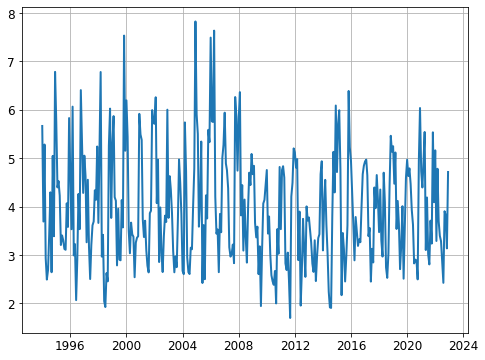

In [9]:
plt.plot(df_windAvg['Date'], df_windAvg['AvgWind'])


#plt.xlim(pd.to_datetime('2010'),pd.to_datetime('2016'))

In [10]:
DTR_all = []   # List of Lists years in the first layer, month in the second

for y in range(len(years)):
    DTR_year = []
    for i in range(0,12):
        #print(str(y)+ '/'+str(i))
    # Sample temperature data
        data = years[y][i]['T2 [°C] (average, Thermometer)']

        df_DTR = pd.DataFrame(columns=['Date', 'DTR', 'TMin', 'TMax', 'TAvg'])

        subset_length = 1440

        for start in range(0, len(data), subset_length):
            subset = data.iloc[start:start + subset_length]
            if np.sum(np.isnan(subset)) < 200:
                T_Min = np.min(subset)
                T_Max = np.max(subset)
                T_Avg = np.mean(subset)
                DTR = T_Max - T_Min
                date_value = years[y][i]['Date/Time'].iloc[start]  # Assuming you want the date at the start of each subset

                df_temp = pd.DataFrame({'Date': [date_value], 'DTR': [DTR], 'TMin': [T_Min], 'TMax': [T_Max], 'TAvg': [T_Avg]})
                df_DTR = pd.concat([df_DTR, df_temp], ignore_index=True)
        DTR_year.append(df_DTR.copy())
    DTR_all.append(DTR_year.copy())

In [11]:
DTR_all[0][0]

,Date,DTR,TMin,TMax,TAvg
0,1994-01-01 00:00:00,18.0,-25.8,-7.8,-13.754065
1,1994-01-06 00:00:00,14.4,-21.3,-6.9,-12.704175
2,1994-01-11 00:00:00,14.9,-27.2,-12.3,-19.207376
3,1994-01-16 00:15:00,18.6,-21.5,-2.9,-12.815994
4,1994-01-21 00:15:00,22.4,-24.0,-1.6,-12.348430
5,1994-01-26 00:15:00,10.4,-23.7,-13.3,-18.935261
6,1994-01-31 00:15:00,7.3,-13.9,-6.6,-10.411228


In [12]:
# DTR_mean_all = []

# for y in range(len(years)):
#     DTR_mean_year = []
#     for i in range(0,12):
    
#     # Sample temperature data
#         data = DTR_all[y][i]['DTR']
#         temp = np.mean(data)
        
#         DTR_mean_year.append(temp)
#     DTR_mean_all.append(DTR_mean_year.copy())



In [13]:
Data_mean_all = []

for y in range(len(years)):
    DTR_mean_year = []
    for i in range(0,12):
    
    # Sample temperature data
        data = DTR_all[y][i]
        temp = np.mean(data)
        
        DTR_mean_year.append(temp)
    Data_mean_all.append(DTR_mean_year.copy())


DTR_mean_all = []
for y in range(len(years)):
    temp = []
    for m in range(0,12):
        temp.append(Data_mean_all[y][m]['DTR'])
    DTR_mean_all.append(temp.copy())

TAvg_mean_all = []
for y in range(len(years)):
    temp = []
    for m in range(0,12):
        temp.append(Data_mean_all[y][m]['TAvg'])
    TAvg_mean_all.append(temp.copy())

c:\Users\leonh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\leonh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [14]:
Data_Resorted_month = []  # Here first layer month and second layer years

for i in range(0,12):

    DTR_resort_month = []
    for y in range(len(years)):
        temp = Data_mean_all[y][i]
        DTR_resort_month.append(temp)

    Data_Resorted_month.append(DTR_resort_month.copy())

In [15]:
Data_Resorted_month[0][0]

Data_mean_all[0][0]

data_all_df = pd.DataFrame(columns=['DTR', 'TMin', 'TMax', 'TAvg'])

for y in range(len(years)):
    for m in range(0,12):
        temp_dtr = Data_mean_all[y][m]['DTR']
        temp_TMin = Data_mean_all[y][m]['TMin']
        temp_TMax = Data_mean_all[y][m]['TMax']
        temp_TAvg = Data_mean_all[y][m]['TAvg']

        df_temp = pd.DataFrame({'DTR': [temp_dtr], 'TMin': [temp_TMin], 'TMax': [temp_TMax], 'TAvg': [temp_TAvg]})
        data_all_df = pd.concat((data_all_df, df_temp), ignore_index= True)

data_all_df['Date'] = df_windAvg['Date']

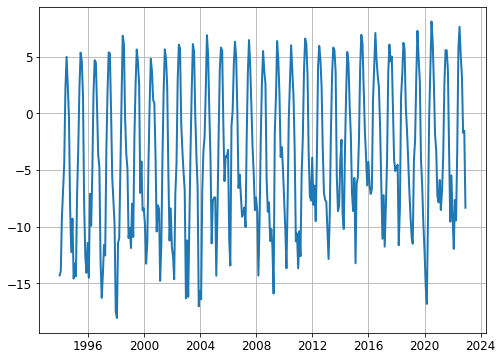

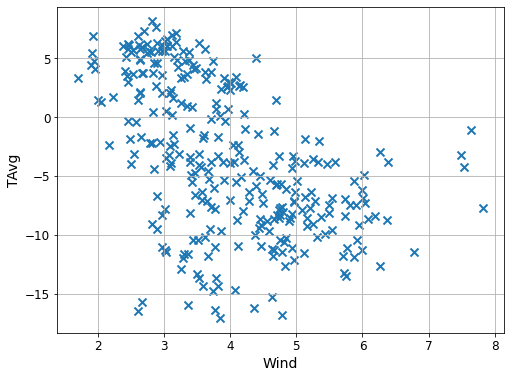

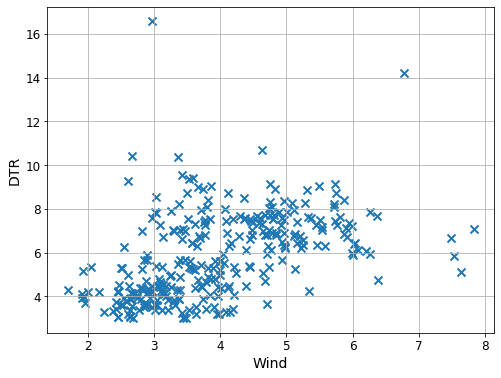

In [23]:
data_all_df
plt.plot(data_all_df['Date'], data_all_df['TAvg'])
plt.show()

plt.scatter(df_windAvg['AvgWind'][50:], data_all_df['TAvg'][50:], marker = 'x')

plt.xlabel('Wind')
plt.ylabel('TAvg')

plt.savefig('SB_wind_T2Avg.png', dpi = 300)
plt.show()

plt.scatter(df_windAvg['AvgWind'][50:], data_all_df['DTR'][50:], marker = 'x')

plt.xlabel('Wind')
plt.ylabel('DTR')

plt.savefig('SB_wind_DTR.png', dpi = 300)
plt.show()


In [17]:

DTR_Resorted_month = []
for m in range(0,12):
    temp = []
    for y in range(len(years)):
        temp.append(Data_Resorted_month[m][y]['DTR'])
    DTR_Resorted_month.append(temp.copy())

Tavg_Resorted_month = []
for m in range(0,12):
    temp = []
    for y in range(len(years)):
        temp.append(Data_Resorted_month[m][y]['TAvg'])
    Tavg_Resorted_month.append(temp.copy())

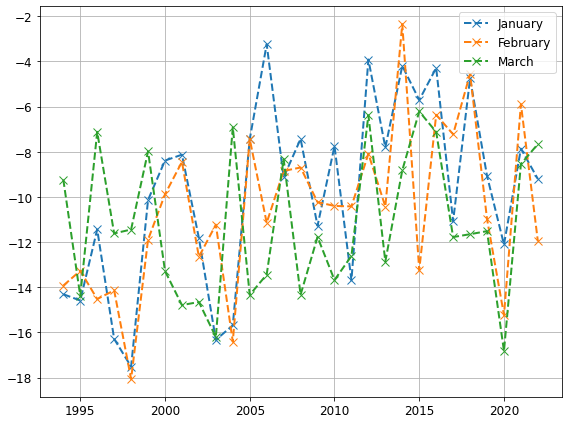

In [18]:
for m in range(0,3):
    plt.plot(x_data_years,Tavg_Resorted_month[m], marker = 'x', ls = '--', label = month_label[m])

plt.legend(loc = 1)

#plt.xlim(2000,2022)
#plt.ylim(4,10)

plt.xlim()
plt.tight_layout()
plt.show()


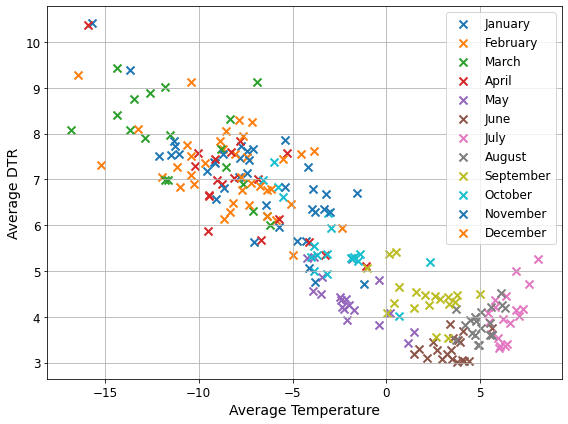

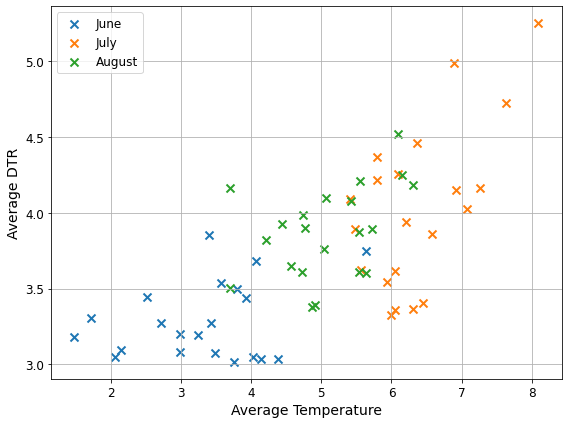

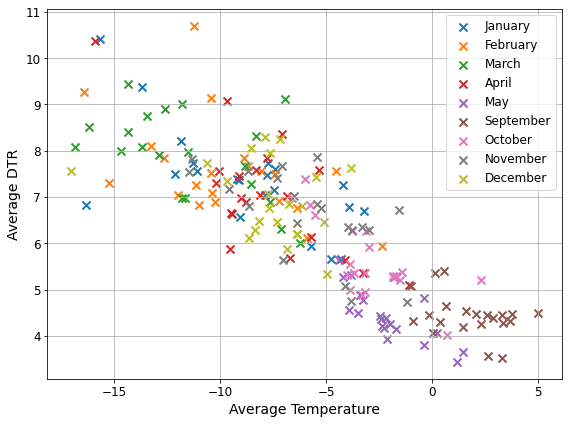

In [19]:
for m in range(0,12):
    plt.scatter(Tavg_Resorted_month[m][10:],DTR_Resorted_month [m][10:], marker = 'x', label = month_label[m])


#plt.xlim(2000,2022)
#plt.ylim(4,10)
plt.xlabel('Average Temperature')
plt.ylabel('Average DTR')

#plt.xlim()

plt.legend()
plt.tight_layout()
plt.show()


for m in range(5,8):
    plt.scatter(Tavg_Resorted_month[m][8:],DTR_Resorted_month [m][8:], marker = 'x', label = month_label[m])


#plt.xlim(2000,2022)
#plt.ylim(4,10)
plt.xlabel('Average Temperature')
plt.ylabel('Average DTR')

#plt.xlim()

plt.legend()
plt.tight_layout()
plt.show()


for m in range(0,5):
    plt.scatter(Tavg_Resorted_month[m][8:],DTR_Resorted_month [m][8:], marker = 'x', label = month_label[m])

for m in range(8,12):
    plt.scatter(Tavg_Resorted_month[m][8:],DTR_Resorted_month [m][8:], marker = 'x', label = month_label[m])

#plt.xlim(2000,2022)
#plt.ylim(4,10)
plt.xlabel('Average Temperature')
plt.ylabel('Average DTR')

#plt.xlim()

plt.legend()
plt.tight_layout()
plt.show()



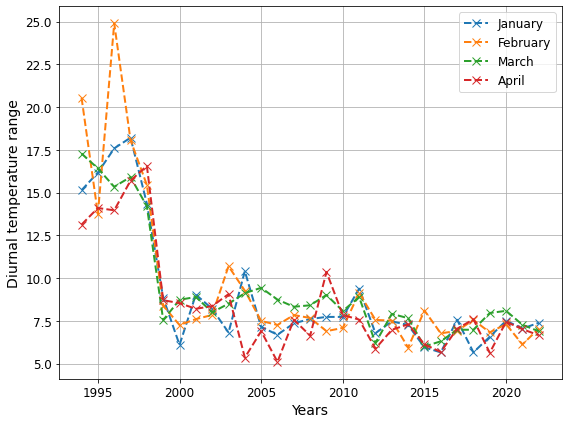

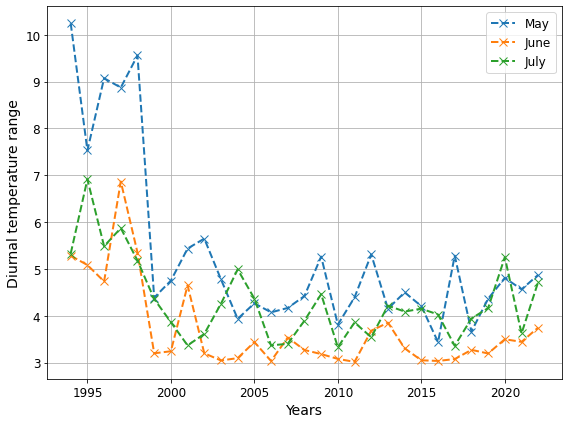

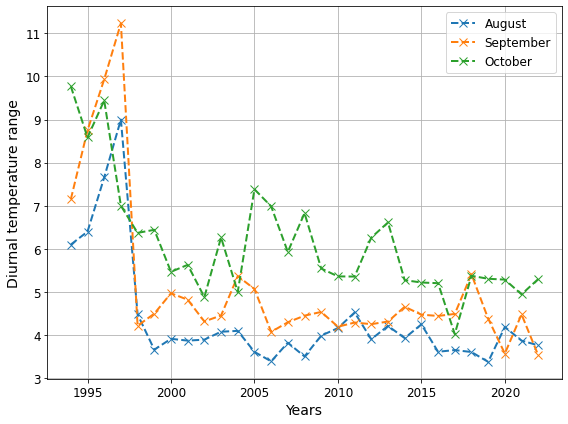

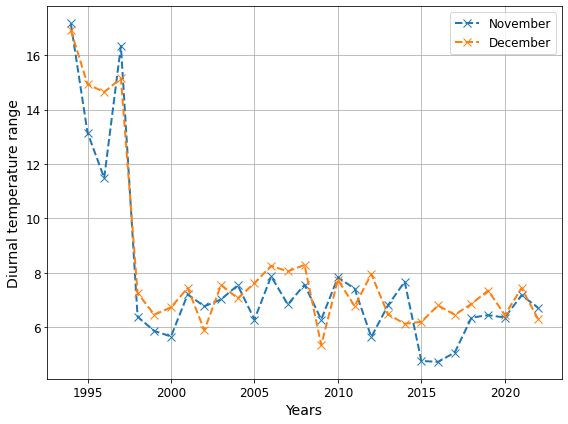

In [26]:
for m in range(0,4):
    plt.plot(x_data_years,DTR_Resorted_month[m], marker = 'x', ls = '--', label = month_label[m])

plt.legend(loc = 1)

plt.xlabel('Years')
plt.ylabel('Diurnal temperature range')
#plt.xlim(2000,2022)
#plt.ylim(4,10)

plt.xlim()
plt.tight_layout()
plt.show()

for m in range(4,7):
    plt.plot(x_data_years,DTR_Resorted_month[m], marker = 'x', ls = '--', label = month_label[m])

plt.legend(loc = 1)

plt.xlabel('Years')
plt.ylabel('Diurnal temperature range')
#plt.xlim(2000,2022)
#plt.ylim(4,10)

plt.xlim()
plt.tight_layout()
plt.show()

for m in range(7,10):
    plt.plot(x_data_years,DTR_Resorted_month[m], marker = 'x', ls = '--', label = month_label[m])

plt.legend(loc = 1)

plt.xlabel('Years')
plt.ylabel('Diurnal temperature range')
#plt.xlim(2000,2022)
#plt.ylim(4,10)

plt.xlim()
plt.tight_layout()
plt.show()

for m in range(10,12):
    plt.plot(x_data_years,DTR_Resorted_month[m], marker = 'x', ls = '--', label = month_label[m])

plt.legend(loc = 1)

plt.xlabel('Years')
plt.ylabel('Diurnal temperature range')
#plt.xlim(2000,2022)
#plt.ylim(4,10)

plt.xlim()
plt.tight_layout()
plt.show()



(array([8797., 8801., 8805., 8809., 8813., 8817., 8821., 8825.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

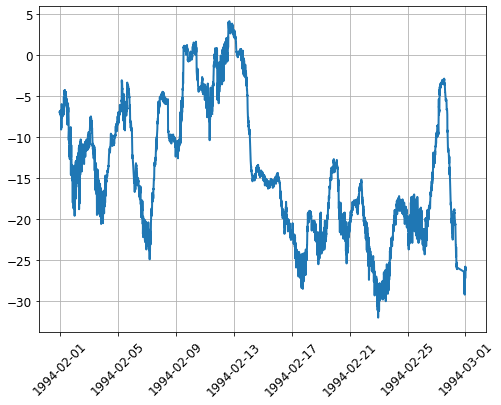

In [21]:

plt.plot(years[0][1]['Date/Time'], years[0][1]['T2 [°C] (average, Thermometer)'])

plt.xticks(rotation = 45)

[15.142857142857144, 20.55, 17.285714285714285, 13.133333333333333, 10.242857142857144, 5.283333333333333, 5.328571428571428, 6.1, 7.150000000000001, 9.771428571428572, 17.166666666666668, 16.914285714285715]


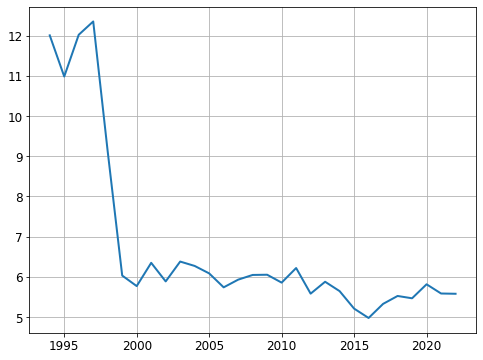

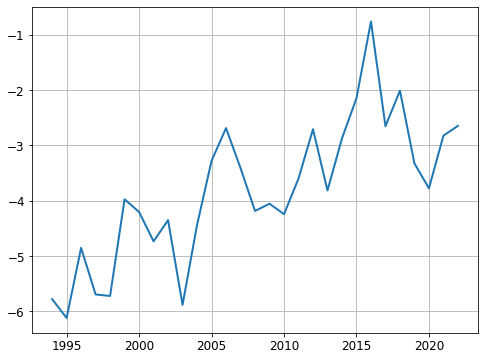

In [22]:
print(DTR_mean_all[0])

DTR_mean_byYear = []
for i in range(len(years)):
    temp = np.mean(DTR_mean_all[i])
    DTR_mean_byYear.append(temp)


plt.plot(x_data_years,DTR_mean_byYear)

plt.show()


TAvg_mean_byYear = []
for i in range(len(years)):
    temp = np.mean(TAvg_mean_all[i])
    TAvg_mean_byYear.append(temp)

plt.plot(x_data_years, TAvg_mean_byYear)

plt.show()
